In [1]:
import pandas as pd
df = pd.read_csv("house.csv")

In [2]:
df.head()

,number_of_rooms,floor,area,latitude,longitude,price
0,1,1,58.0,38.585834,68.793715,330000
1,1,14,68.0,38.522254,68.749918,340000
2,3,8,50.0,NaN,NaN,700000
3,3,14,84.0,38.520835,68.747908,700000
4,3,3,83.0,38.564374,68.739419,415000


In [3]:
df.dropna(inplace=True)

In [4]:
df.isnull().sum()

number_of_rooms    0
floor              0
area               0
latitude           0
longitude          0
price              0
dtype: int64

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

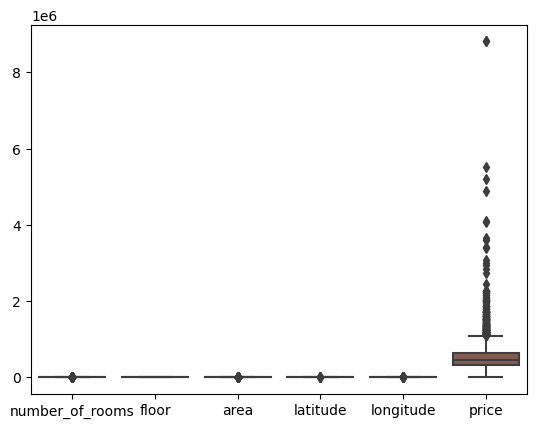

In [9]:
# see if data has a outliers 
sns.boxplot(df)

<Axes: >

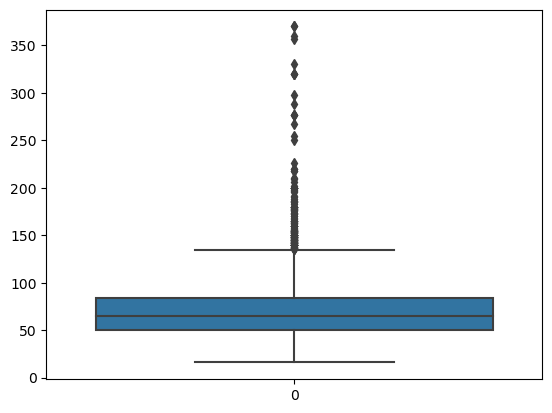

In [10]:
#show outliers in the upper part 
sns.boxplot(df['area'])

<Axes: >

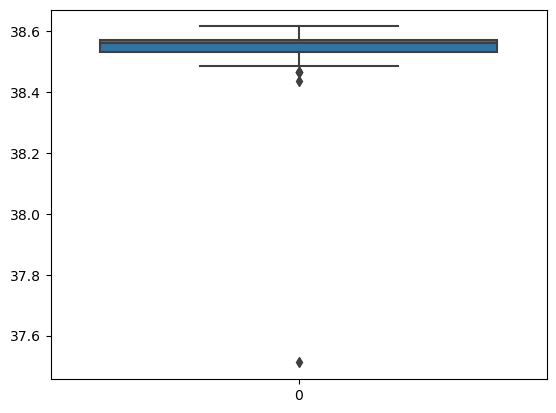

In [11]:
#show outliers in the lower part 
sns.boxplot(df['latitude'])

<function matplotlib.pyplot.show(close=None, block=None)>

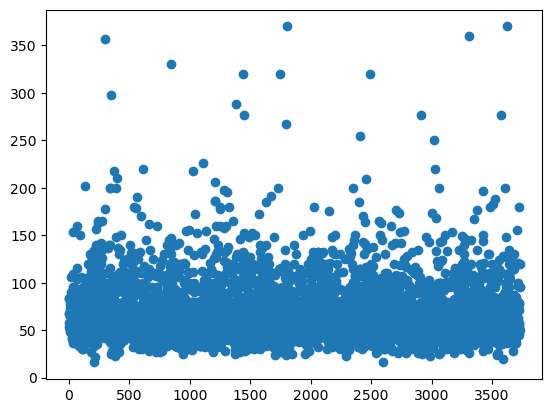

In [12]:
plt.scatter([i for i in range(len(df))], df['area'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

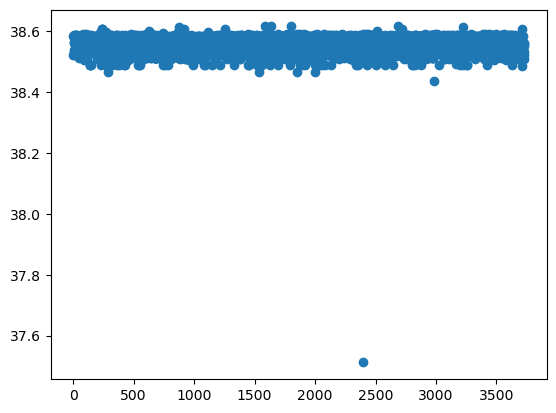

In [13]:
plt.scatter([i for i in range(len(df))], df['latitude'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

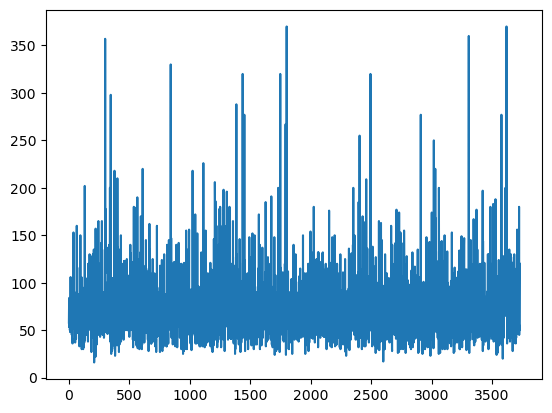

In [14]:
plt.plot([i for i in range(len(df))], df['area'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

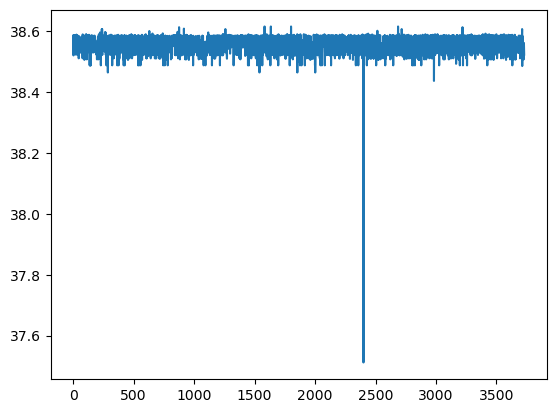

In [15]:
plt.plot([i for i in range(len(df))], df['latitude'])
plt.show

In [16]:
#handle the outliers
from numpy import mean
from numpy import std

In [19]:
df_mean = mean(df['area'])
df_std = std(df['area'])

In [20]:
cut_off = df_std*3
lower = df_mean - cut_off
upper = df_mean + cut_off

In [21]:
outliers = [x for x in df.area if x<lower or x>upper]

In [22]:
outliers

[202.0,
 357.0,
 178.0,
 200.0,
 200.0,
 298.0,
 218.0,
 200.0,
 210.0,
 180.0,
 179.0,
 190.0,
 220.0,
 330.0,
 218.0,
 226.0,
 206.0,
 186.0,
 186.0,
 178.0,
 180.0,
 198.0,
 196.0,
 180.0,
 288.0,
 320.0,
 277.0,
 185.0,
 191.0,
 200.0,
 320.0,
 267.0,
 370.0,
 180.0,
 176.0,
 200.0,
 185.0,
 255.0,
 209.0,
 320.0,
 177.0,
 174.0,
 277.0,
 174.0,
 250.0,
 220.0,
 200.0,
 360.0,
 177.0,
 197.0,
 180.0,
 183.0,
 188.0,
 277.0,
 200.0,
 370.0,
 180.0]

In [23]:
#tell me how many outliers there are in the area 
print('total outliers:', len(outliers))

total outliers: 57


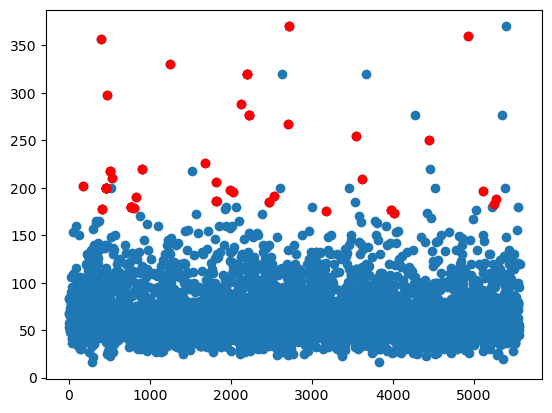

In [25]:
plt.scatter(df.area.index, df.area)

for i in df.area:
    if i in outliers:
        plt.scatter(df.area[df.area==i].index[0], i, c='r')
plt.show()

In [26]:
#want to handle more outlier we have to decrease the range
cut_off = df_std*2.5
lower = df_mean - cut_off
upper = df_mean + cut_off

In [27]:
outliers = [x for x in df.area if x<lower or x>upper]

In [28]:
print('total outliers:', len(outliers))

total outliers: 81


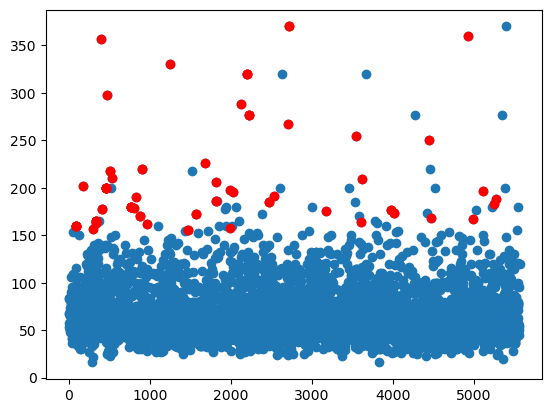

In [29]:
plt.scatter(df.area.index, df.area)

for i in df.area:
    if i in outliers:
        plt.scatter(df.area[df.area==i].index[0], i, c='r')
plt.show()

In [31]:
#filter and remove outlier from dataset
df.drop(df.area[df.area < lower].index, inplace=True)
df.drop(df.area[df.area > upper].index, inplace=True)

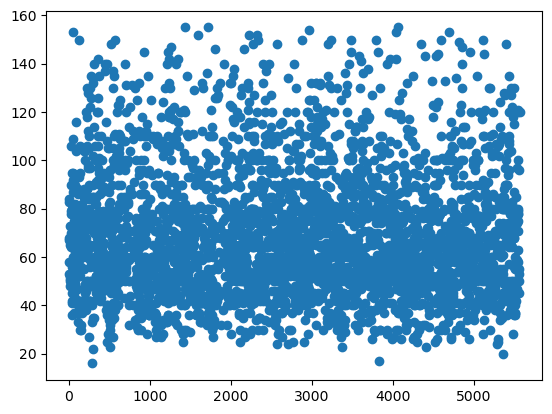

In [32]:
plt.scatter(df.area.index, df.area)